# WELCOME!

Welcome to **"Bike Demand Visualization Project"**. As you know recently, free or affordable access to bicycles has been provided for short-distance trips in an urban area as an alternative to motorized public transport or private vehicles. Thus, it is aimed to reduce traffic congestion, noise and air pollution.  

The aim of this project is to reveal the current patterns in the data by showing the historical data of London bike shares with visualization tools.

This will allow us to X-ray the data as part of the EDA process before setting up a machine learning model.



---
---



# #Determines



#### Features

- timestamp - timestamp field for grouping the data
- cnt - the count of a new bike shares
- t1 - real temperature in C
- t2 - temperature in C “feels like”
- hum - humidity in percentage
- wind_speed - wind speed in km/h
- weather_code - category of the weather
- is_holiday - boolean field - 1 holiday / 0 non holiday
- is_weekend - boolean field - 1 if the day is weekend
- season - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.

**"weather_code" category description:**
* 1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity 
* 2 = scattered clouds / few clouds 
* 3 = Broken clouds 
* 4 = Cloudy 
* 7 = Rain/ light Rain shower/ Light rain 
* 10 = rain with thunderstorm 
* 26 = snowfall 
* 94 = Freezing Fog
---

Initially, the task of discovering data will be waiting for you as always. Recognize features, detect missing values, outliers etc.  Review the data from various angles in different time breakdowns. For example, visualize the distribution of bike shares by day of the week. With this graph, you will be able to easily observe and make inferences how people's behavior changes daily. Likewise, you can make hourly, monthly, seasonally etc. analyzes. In addition, you can analyze correlation of variables with a heatmap.  


# Tasks


### 1.Import libraries

In [185]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from pylab import rcParams
sns.set_style("darkgrid")

import warnings
warnings.filterwarnings("ignore")

### 2.Read dataset

In [186]:
df = pd.read_csv('store_sharing.csv', index_col=0, parse_dates=True)
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


### 3.Check missing values and if there are any dublicate rows or not.

In [180]:
missing = df.isna().any().any()
duplicates = df.duplicated()

print('Missing Values: ', missing, '\n')
print('Duplicate Rows: ',duplicates)


Missing Values:  False 

Duplicate Rows:  timestamp
2015-01-04 00:00:00    False
2015-01-04 01:00:00    False
2015-01-04 02:00:00    False
2015-01-04 03:00:00    False
2015-01-04 04:00:00    False
                       ...  
2017-01-03 19:00:00    False
2017-01-03 20:00:00    False
2017-01-03 21:00:00    False
2017-01-03 22:00:00    False
2017-01-03 23:00:00    False
Length: 17414, dtype: bool


### 4.Plot the distribution of various discrete features on (Season, haliday, weekend and weathercode)

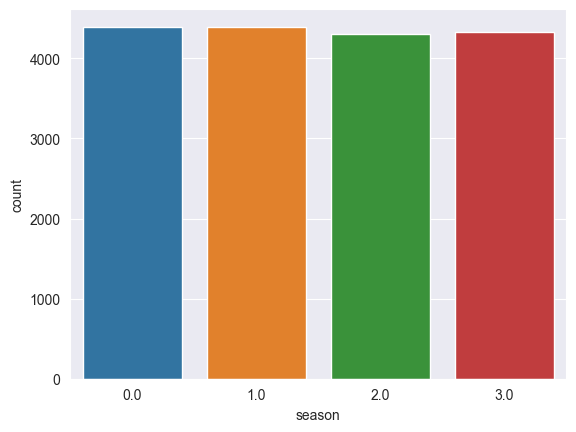

In [181]:
# season

sns.countplot(x='season', data=df)
plt.show()

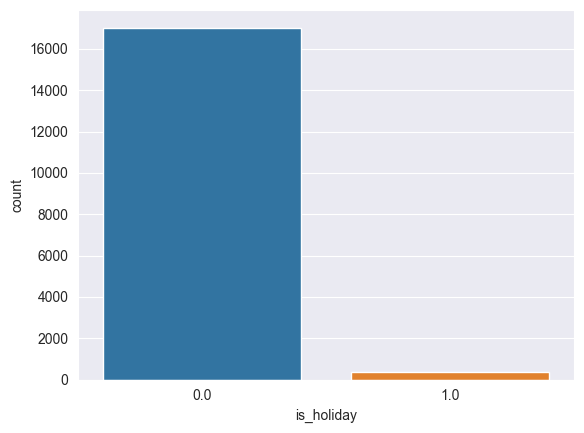

In [182]:
# is_holiday

sns.countplot(x='is_holiday', data=df)
plt.show()

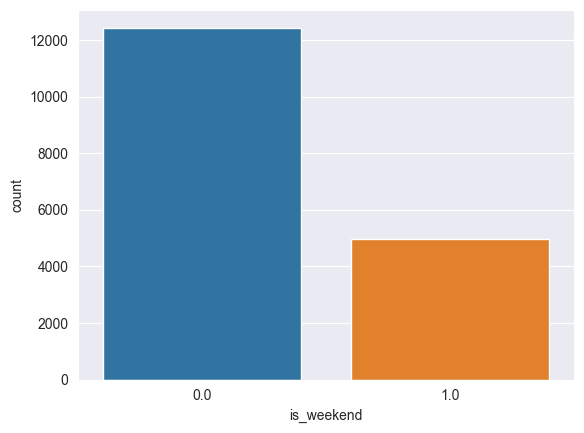

In [183]:
# is_weekend

sns.countplot(x='is_weekend', data=df)
plt.show()

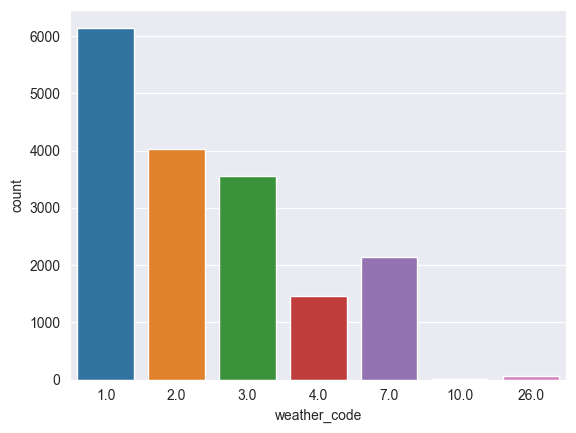

In [184]:
# weather_code

sns.countplot(x='weather_code', data=df)
plt.show()

### 5.Look at the data type of each variable, transform `timestamp` in type, and set it as index.

In [83]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['timestamp'] = df['timestamp'].dt.strftime('%B %d, %Y, %r')
df.set_index('timestamp', inplace=True)
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
"January 04, 2015, 12:00:00 AM",182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
"January 04, 2015, 01:00:00 AM",138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
"January 04, 2015, 02:00:00 AM",134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
"January 04, 2015, 03:00:00 AM",72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
"January 04, 2015, 04:00:00 AM",47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


- Tam 2 yillik bir timestamp var. `year, month, day_of_month, day_of_week, hour` bilgilerini alarak feature engineering yapalim

In [87]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['timestamp'] = df['timestamp'].dt.strftime('%Y %B %d, %a, %r')
df.set_index('timestamp', inplace=True)
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
"2015 January 04, Sun, 12:00:00 AM",182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
"2015 January 04, Sun, 01:00:00 AM",138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
"2015 January 04, Sun, 02:00:00 AM",134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
"2015 January 04, Sun, 03:00:00 AM",72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
"2015 January 04, Sun, 04:00:00 AM",47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


### 6.Make feature engineering. Extract new columns (day of the week, day of the month, hour, month, season, year etc.)

you can use strftime('%Y-%m') for year_mount

In [120]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['timestamp'] = df['timestamp'].dt.strftime('%A %d - %r - %b %Y')
df.set_index('timestamp', inplace=True)
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
Sunday 04 - 12:00:00 AM - Jan 2015,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
Sunday 04 - 01:00:00 AM - Jan 2015,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
Sunday 04 - 02:00:00 AM - Jan 2015,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
Sunday 04 - 03:00:00 AM - Jan 2015,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
Sunday 04 - 04:00:00 AM - Jan 2015,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


### 7.Visualize the correlation with a heatmap

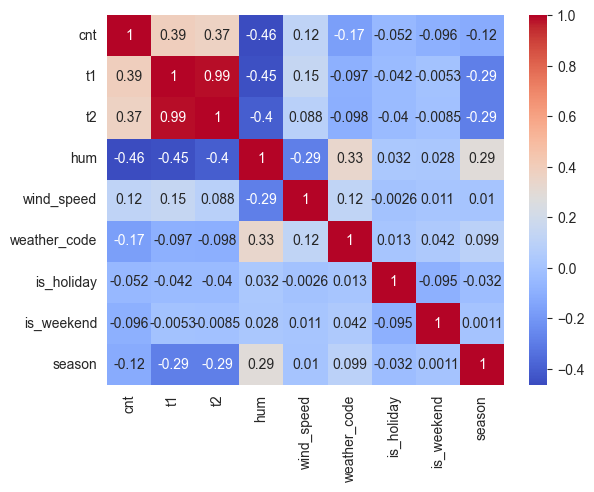

In [131]:
# for all variables 

corr = df.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()

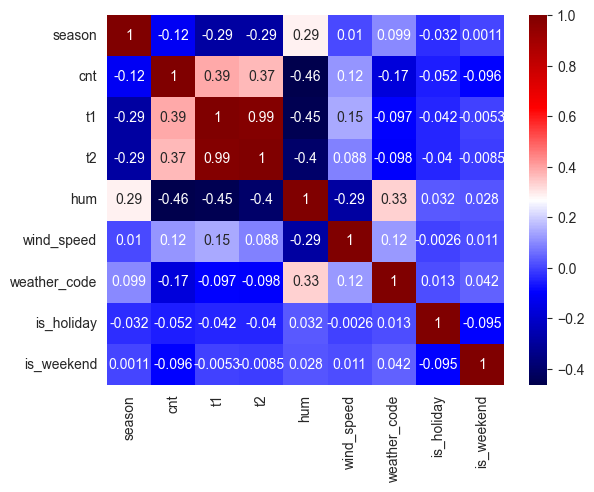

In [135]:
# for the target variable

target_df = df[['season'] + list(df.columns[:-1])]

corr = target_df.corr()

sns.heatmap(corr, annot=True, cmap="seismic")

plt.show()

### 8. Visualize the correlation of the target variable and the other features with barplot

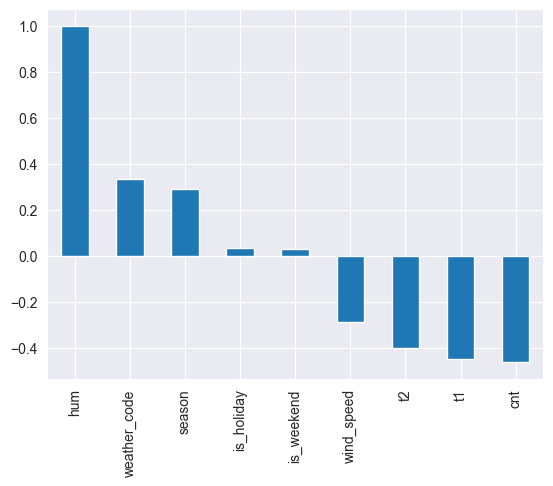

In [137]:
#with pandas

corr = target_df.corr()

target_df = corr['hum'].sort_values(ascending=False)

target_df.plot.bar()

plt.show()

### 9.Plot bike shares over time use lineplot

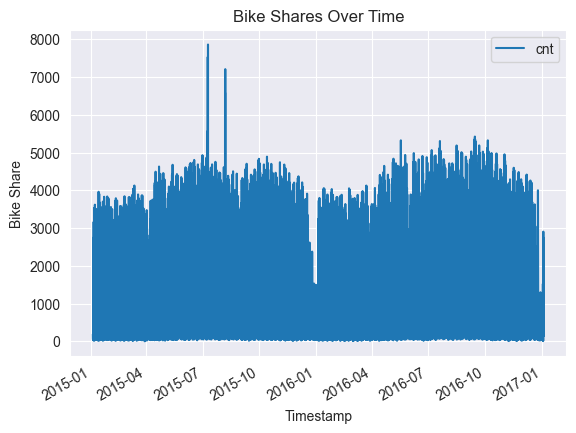

In [173]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)

df.plot(y='cnt', kind='line')

plt.title("Bike Shares Over Time")
plt.xlabel("Timestamp")
plt.ylabel("Bike Share")

plt.show()

### 10.Plot bike shares by months and year_of_month (use lineplot, pointplot, barplot)

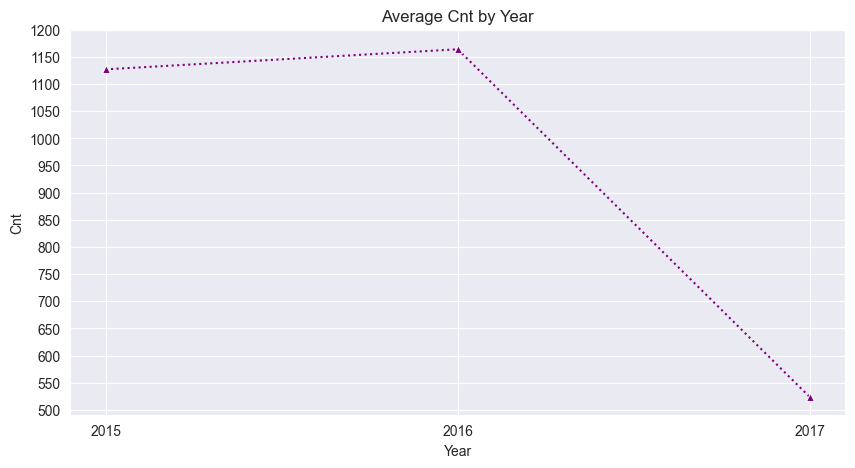

In [503]:
df = pd.read_csv('store_sharing.csv', parse_dates=True)

# Data cleaning
df.replace(['-'], 0.0, inplace = True)

# Change the data type
df['timestamp'] = pd.to_datetime(df['timestamp'])

# group by year
df['year'] = df['timestamp'].dt.year
df_y = df.groupby('year')
df_r = df_y['cnt'].mean().round()


# Visualization
plt.figure(figsize=(10, 5))

sns.lineplot(data=df_r, linestyle=":", marker="^", color="purple")

# add labels and title
plt.xlabel('Year')
plt.ylabel('Cnt')
plt.title('Average Cnt by Year')
plt.yticks(np.arange(500, 1250, 50))
plt.xticks(np.arange(2015, 2018, 1))
plt.grid(True)
plt.minorticks_on()

# show the plot
plt.show()

In [489]:
df = pd.read_csv('store_sharing.csv', parse_dates=True)

# Change the data type
df['timestamp'] = pd.to_datetime(df['timestamp'])
# group by month

df['month'] = df['timestamp'].dt.month
df_m = df.groupby('month')
df_r = df_m['cnt'].mean().round(2)
df_r = df_r.astype(int)

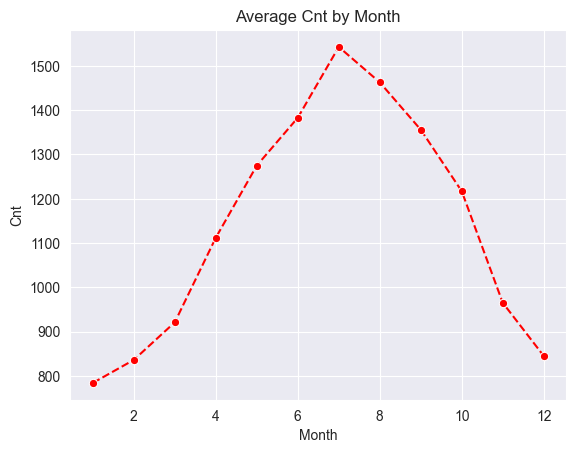

In [488]:
# with lineplot

# group by month

df['month'] = df['timestamp'].dt.month
df_m = df.groupby('month')
df_r = df_m['cnt'].mean().round(2)
df_r = df_r.astype(int)
sns.lineplot(data=df_r, linestyle="--", marker="o", color="red")

# add labels and title
plt.xlabel('Month')
plt.ylabel('Cnt')
plt.title('Average Cnt by Month')

# show the plot
plt.show()

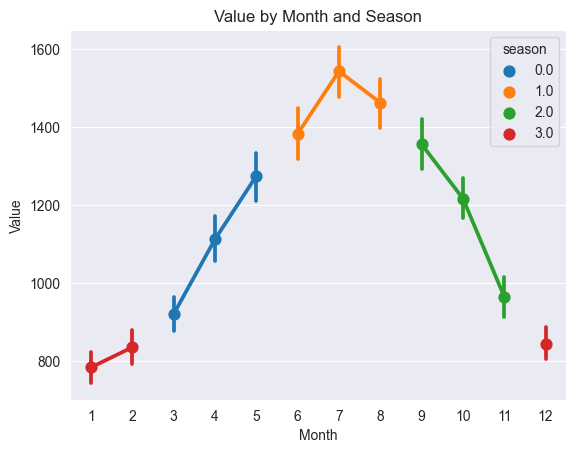

In [420]:
# with pointplot

df = pd.read_csv('store_sharing.csv', parse_dates=True)

# Change the data type
df['timestamp'] = pd.to_datetime(df['timestamp'])
# group by month

df['month'] = df['timestamp'].dt.month
df_m = df.groupby('month')
df_r = df_m['cnt'].mean().round(2)



# visualization 
sns.pointplot(x='month', y='cnt', data=df, hue='season')

# add labels and title
plt.xlabel('Month')
plt.ylabel('Value')
plt.title('Value by Month and Season')

# show the plot
plt.show()

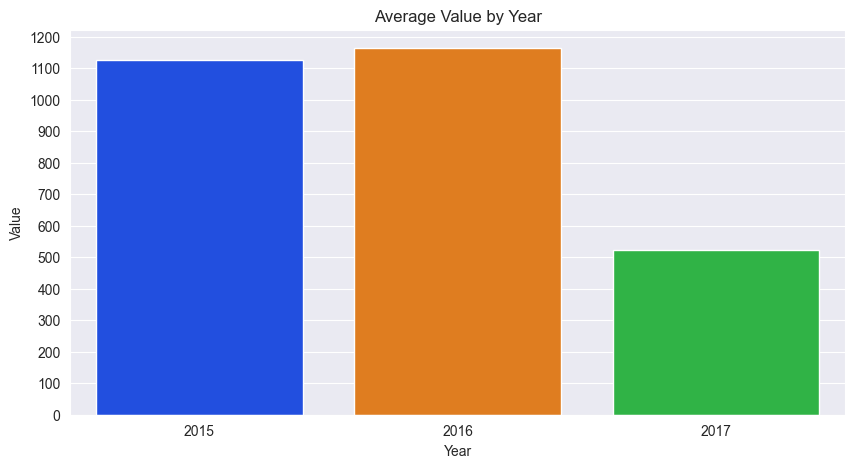

In [394]:
# with barplot

# visualization
plt.figure(figsize=(10, 5))

sns.barplot(x=df_r.index, y=df_r, label='Value', palette='bright')
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Average Value by Year')
plt.yticks(np.arange(0, 1201, 100))

plt.show()

### 11.Plot bike shares by hours on (holidays, weekend, season)

In [585]:
# with lineplot (*whether it is a holiday or not*)

df = pd.read_csv('store_sharing.csv', parse_dates=True)

# Change the data type
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['hour'] = df['timestamp'].dt.hour

# group by hour

df_hour = df.groupby(by=['hour', 'is_holiday', 'is_weekend', 'season']).mean().reset_index()
df_hour


,hour,is_holiday,is_weekend,season,cnt,t1,t2,hum,wind_speed,weather_code
0,0,0.0,0.0,0.0,171.780488,9.117886,7.662602,76.170732,14.056911,2.536585
1,0,0.0,0.0,1.0,302.193798,16.581395,16.531008,74.515504,13.992248,2.426357
2,0,0.0,0.0,2.0,210.914062,12.304688,11.773438,80.996094,12.089844,2.625000
3,0,0.0,0.0,3.0,154.803279,6.680328,4.680328,81.172131,15.209016,3.114754
4,0,0.0,1.0,0.0,411.471698,9.301887,8.066038,75.457547,12.825472,2.905660
...,...,...,...,...,...,...,...,...,...,...
259,23,0.0,1.0,2.0,426.300000,11.760000,11.220000,79.800000,11.470000,2.820000
260,23,0.0,1.0,3.0,275.176471,7.598039,5.666667,80.431373,17.166667,3.745098
261,23,1.0,0.0,0.0,296.750000,10.437500,9.312500,77.125000,16.250000,2.875000
262,23,1.0,0.0,1.0,443.000000,16.750000,16.750000,77.000000,5.000000,2.500000


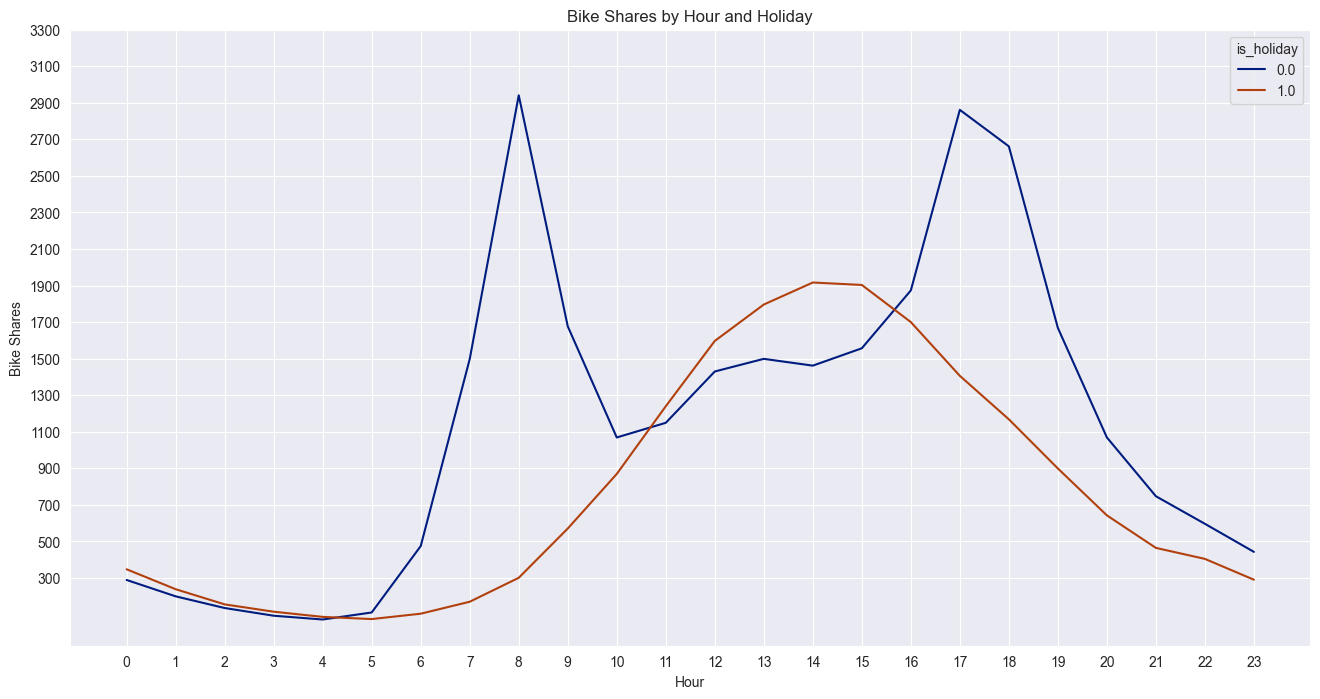

In [579]:
df_grouped = df.groupby(by=['hour', 'is_holiday']).mean().reset_index()

# Plot the grouped data as a line plot

plt.figure(figsize=(16  , 8))

sns.lineplot(x='hour', y='cnt', hue='is_holiday', data=df_grouped, palette='dark')
plt.xlabel('Hour')
plt.ylabel('Bike Shares')
plt.title('Bike Shares by Hour and Holiday')
plt.yticks(np.arange(300, 3400, 200))
plt.xticks(np.arange(0, 24, 1))
plt.grid(True)
plt.minorticks_on()
plt.show()

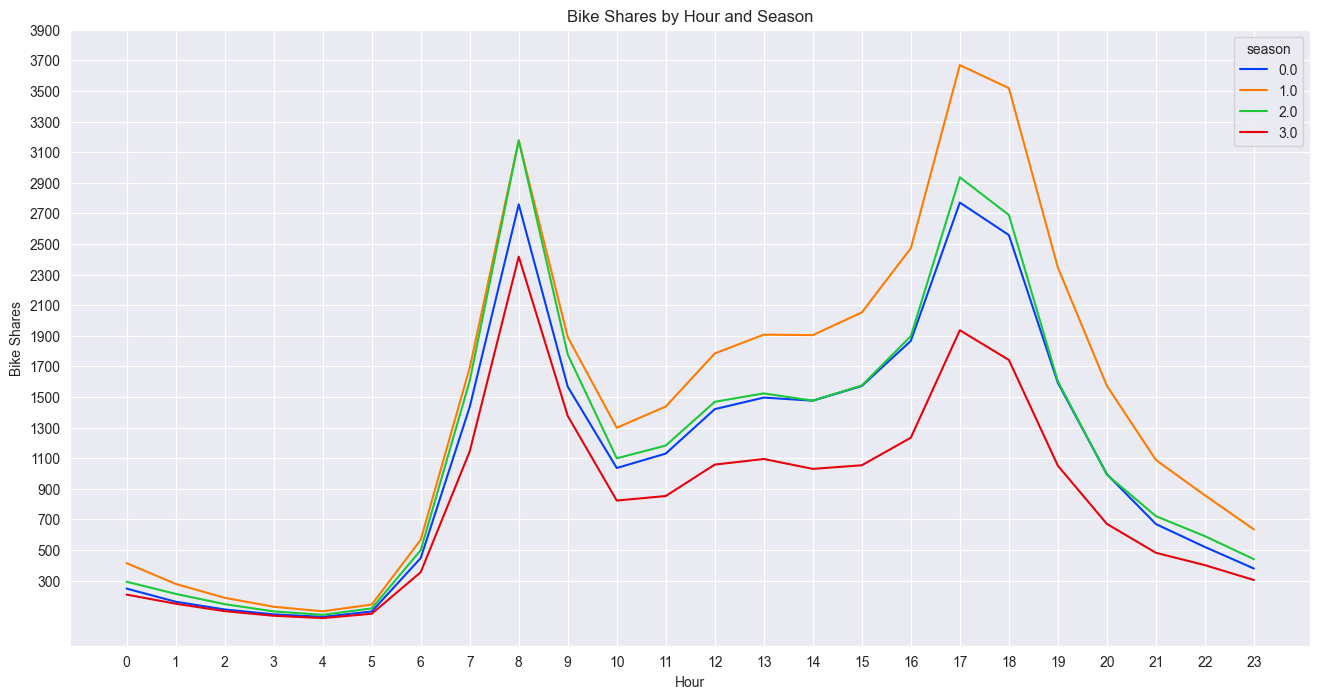

In [580]:
# with lineplot (*You may want to see seasonal breakdowns*)

df_grouped = df.groupby(by=['hour', 'season']).mean().reset_index()

# Plot the grouped data as a line plot

plt.figure(figsize=(16, 8))
sns.lineplot(x='hour', y='cnt', hue='season', data=df_grouped, palette='bright')
plt.xlabel('Hour')
plt.ylabel('Bike Shares')
plt.title('Bike Shares by Hour and Season')
plt.yticks(np.arange(300, 4001, 200))
plt.xticks(np.arange(0, 24, 1))
plt.grid(True)
plt.minorticks_on()
plt.show()

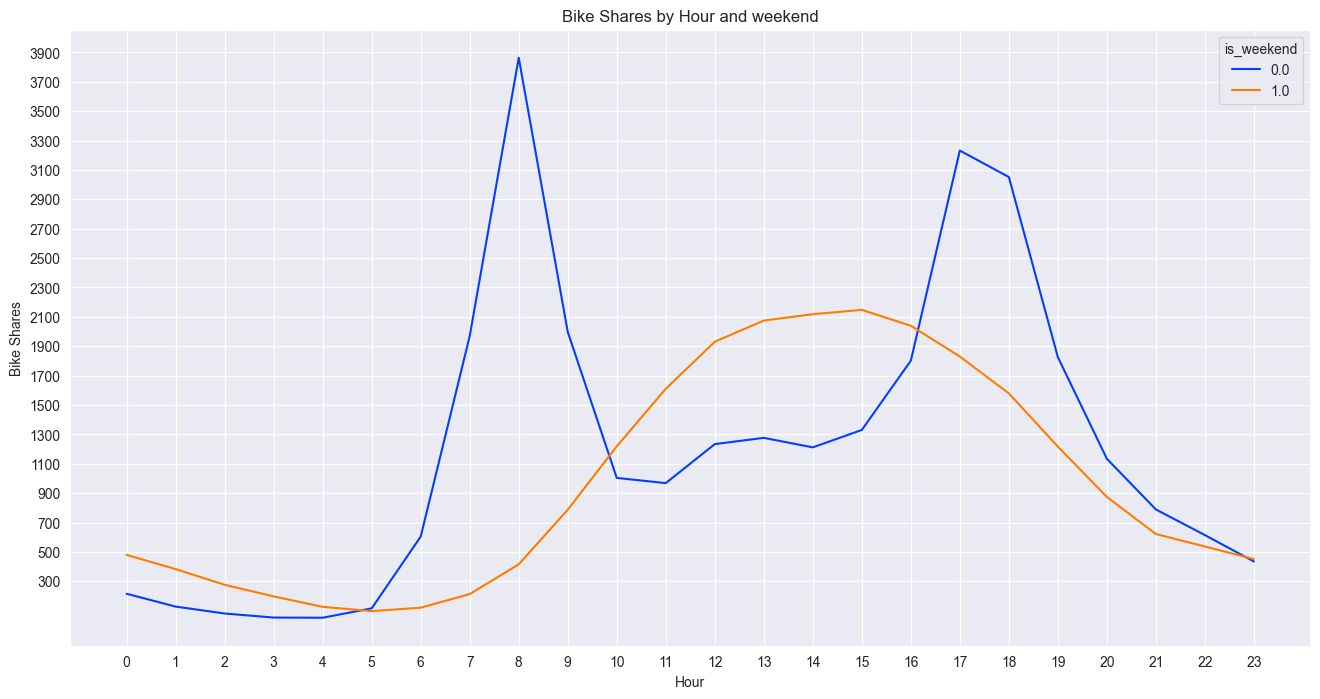

In [584]:
# with pointplot

df_grouped = df.groupby(by=['hour', 'is_weekend']).mean().reset_index()

# Plot the grouped data as a line plot

plt.figure(figsize=(16, 8))
sns.lineplot(x='hour', y='cnt', hue='is_weekend', data=df_grouped, palette='bright')
plt.xlabel('Hour')
plt.ylabel('Bike Shares')
plt.title('Bike Shares by Hour and weekend')
plt.yticks(np.arange(300, 4001, 200))
plt.xticks(np.arange(0, 24, 1))
plt.grid(True)
plt.minorticks_on()
plt.show()

### 12.Plot bike shares by day of week
- You may want to see whether it is a holiday or not

In [699]:
df = pd.read_csv('store_sharing.csv', parse_dates=True)

# Change the data type
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['day_of_week'] = df['timestamp'].dt.day_name()

# group by hour

df_day = df.groupby(by=['day_of_week', 'is_holiday', 'is_weekend', 'season']).mean().reset_index()
df_day.head()

,day_of_week,is_holiday,is_weekend,season,cnt,t1,t2,hum,wind_speed,weather_code
0,Friday,0.0,0.0,0.0,1170.524306,10.643229,9.493924,69.207465,15.449653,2.342014
1,Friday,0.0,0.0,1.0,1456.090909,18.729752,18.656198,67.131405,14.732231,2.233058
2,Friday,0.0,0.0,2.0,1244.286432,12.947236,12.355109,73.616415,14.354271,2.504188
3,Friday,0.0,0.0,3.0,921.949653,7.556424,5.557292,78.543403,17.191840,3.062500
4,Friday,1.0,0.0,0.0,761.125000,10.041667,8.927083,77.239583,11.020833,4.562500


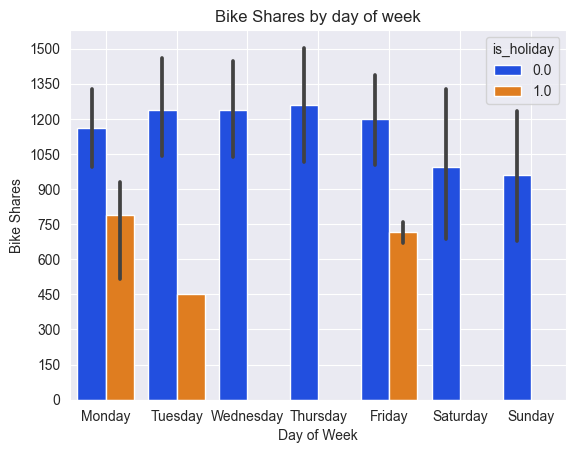

In [700]:
# with barplot
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.barplot(x='day_of_week', y='cnt', hue='is_holiday', data=df_day, palette='bright', order=days_order)
plt.xlabel('Day of Week')
plt.ylabel('Bike Shares')
plt.title('Bike Shares by day of week')
plt.yticks(np.arange(0, 1551, 150))
plt.grid(True)
plt.minorticks_on()
plt.show()

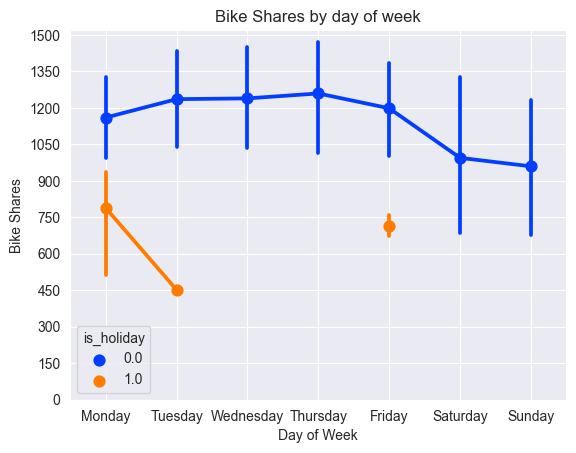

In [701]:
# with pointplot
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

sns.pointplot(x='day_of_week', y='cnt', hue='is_holiday', data=df_day, palette='bright', order=days_order)
plt.xlabel('Day of Week')
plt.ylabel('Bike Shares')
plt.title('Bike Shares by day of week')
plt.yticks(np.arange(0, 1551, 150))
plt.grid(True)
plt.minorticks_on()
plt.show()

### 13.Plot bike shares by day of month

In [605]:
df = pd.read_csv('store_sharing.csv', parse_dates=True)

# Change the data type
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['day'] = df['timestamp'].dt.day

# group by hour

df_day = df.groupby(by=['day', 'is_holiday', 'is_weekend', 'season']).mean().reset_index()

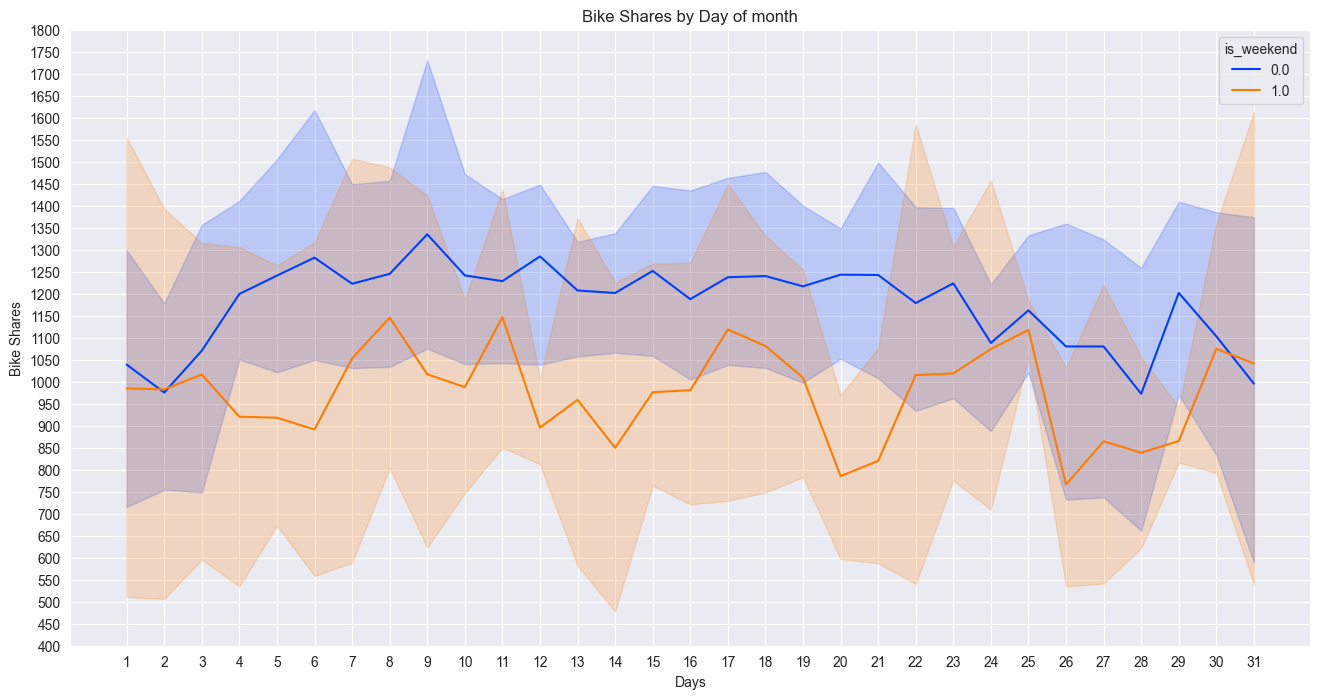

In [604]:
#with lineplot

plt.figure(figsize=(16, 8))
sns.lineplot(x='day', y='cnt', hue='is_weekend', data=df_day, palette='bright')
plt.xlabel('Days')
plt.ylabel('Bike Shares')
plt.title('Bike Shares by Day of month')
plt.yticks(np.arange(400, 1801, 50))
plt.xticks(np.arange(1, 32, 1))
plt.grid(True)
plt.minorticks_on()
plt.show()

### 14.Plot bike shares by year
### Plot bike shares on holidays by seasons

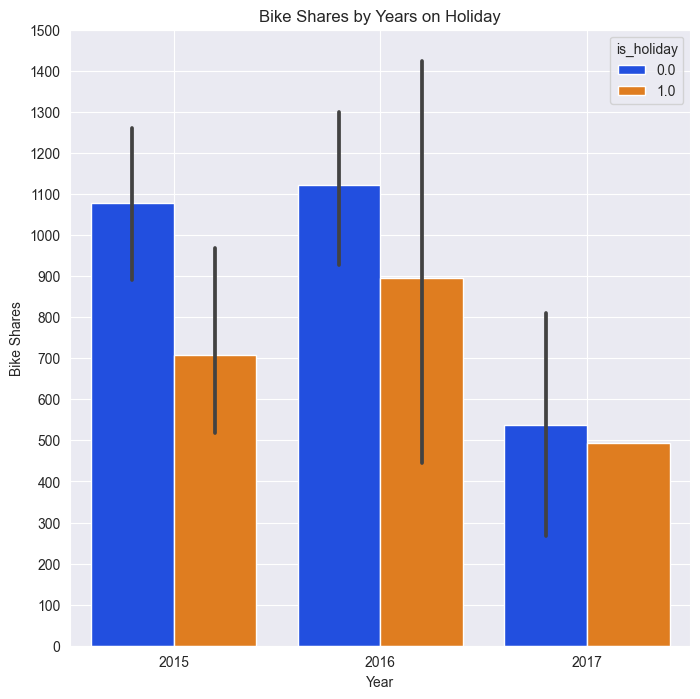

In [628]:
# with barplot

df = pd.read_csv('store_sharing.csv', parse_dates=True)

# Change the data type
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['year'] = df['timestamp'].dt.year

# group by year

df_year = df.groupby(by=['year', 'is_holiday', 'is_weekend', 'season']).mean().reset_index()
# df_year.head()

plt.figure(figsize=(8, 8))
sns.barplot(x='year', y='cnt', hue='is_holiday', data=df_year, palette='bright')
plt.xlabel('Year')
plt.ylabel('Bike Shares')
plt.title('Bike Shares by Years on Holiday')
plt.yticks(np.arange(0, 1551, 100))
plt.grid(True)
plt.minorticks_on()
plt.show()

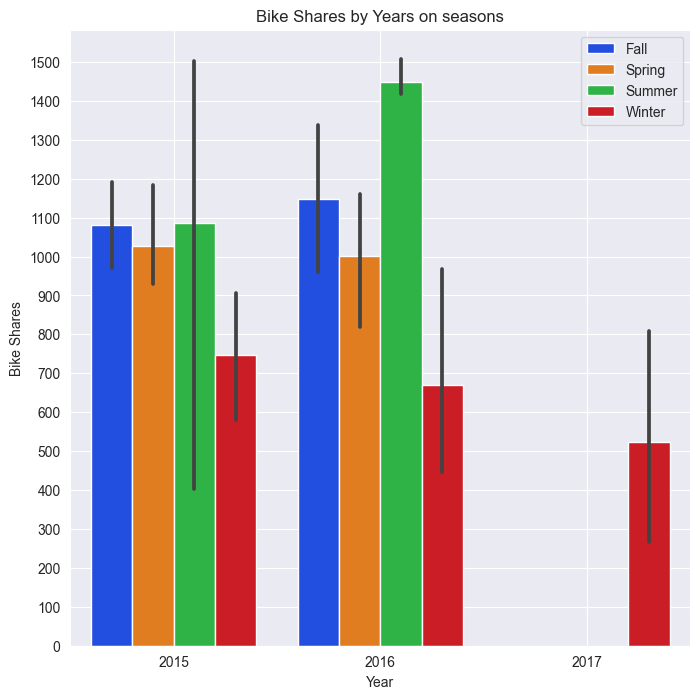

In [670]:
# with barplot

# group by year

df_year = df.groupby(by=['year', 'is_holiday', 'is_weekend', 'season']).mean().reset_index()

# Visualization

plt.figure(figsize=(8, 8))
sns.barplot(x='year', y='cnt', hue='season', data=df_year, palette='bright')
plt.legend(loc= 'upper right')
plt.xlabel('Year')
plt.ylabel('Bike Shares')
plt.title('Bike Shares by Years on seasons')
plt.yticks(np.arange(0, 1551, 100))
plt.grid(True)
plt.minorticks_on()
plt.show()

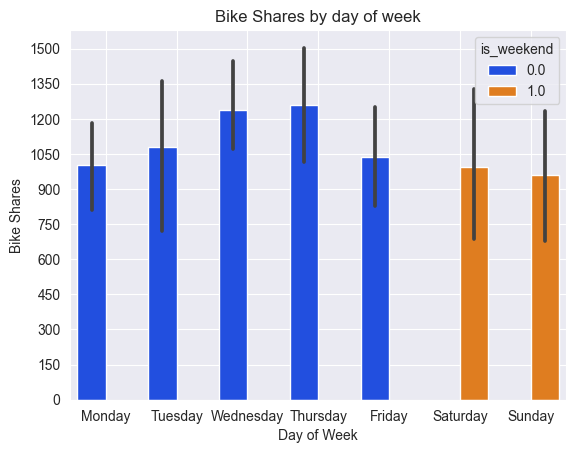

In [706]:
df = pd.read_csv('store_sharing.csv', parse_dates=True)

# Change the data type
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['day_of_week'] = df['timestamp'].dt.day_name()

# group by hour

df_day = df.groupby(by=['day_of_week', 'is_holiday', 'is_weekend', 'season']).mean().reset_index()
df_day.head()

days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

sns.barplot(x='day_of_week', y='cnt', hue='is_weekend', data=df_day, palette='bright', order=days_order )
plt.xlabel('Day of Week')
plt.ylabel('Bike Shares')
plt.title('Bike Shares by day of week')
plt.yticks(np.arange(0, 1551, 150))
plt.grid(True)
plt.minorticks_on()
plt.show()


### 15.Visualize the distribution of bike shares by weekday/weekend with piechart and barplot

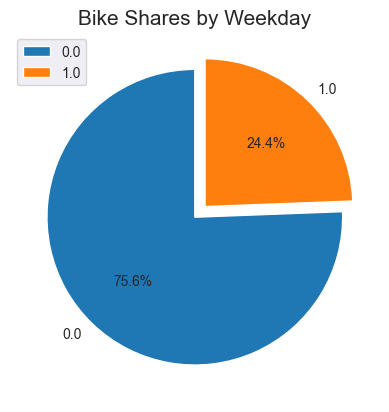

In [738]:
# pie chart

df = pd.read_csv('store_sharing.csv', parse_dates=True)

grouped = df.groupby(['is_weekend']).sum()

explode=[0,0.1] 
# Plot the pie chart
plt.pie(grouped['cnt'], labels=grouped.index, autopct='%1.1f%%', startangle=90, shadow=False, explode=explode)

plt.title('Bike Shares by Weekday', fontsize=15)
plt.legend(loc="upper left", fontsize=10)
plt.grid(True)
plt.minorticks_on()
plt.show()

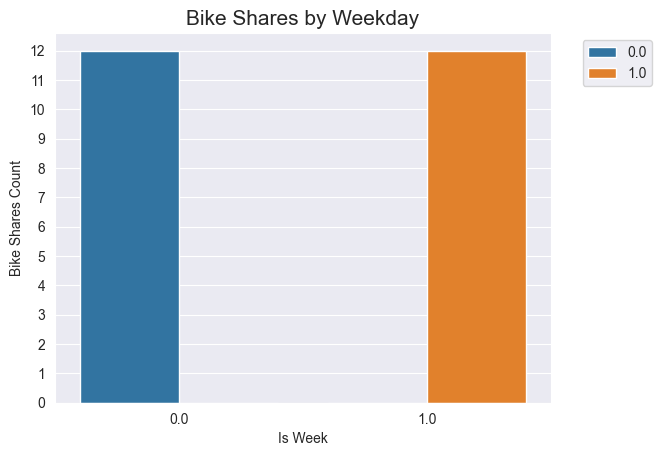

In [813]:
# with countplot

sns.countplot(x="is_weekend", data=df_code, hue="is_weekend")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.title('Bike Shares by Weekday', fontsize=15)
plt.yticks(np.arange(0, 13, 1))
plt.xlabel("Is Week")
plt.ylabel("Bike Shares Count")
plt.show()

### 16.Plot the distribution of weather code by seasons

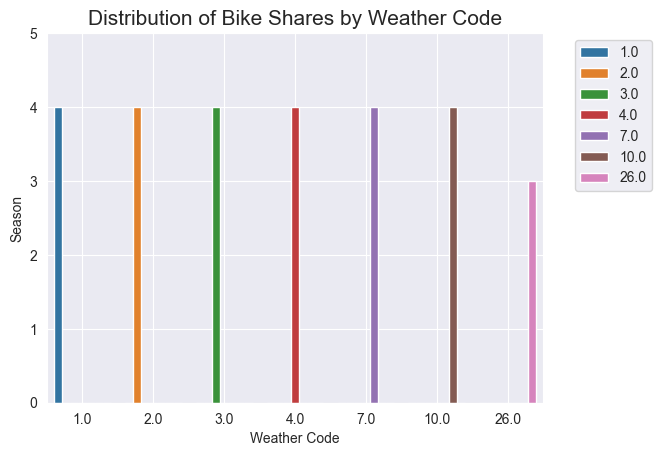

In [773]:
df = pd.read_csv('store_sharing.csv', parse_dates=True)

# Change the data type
df['timestamp'] = pd.to_datetime(df['timestamp'])


# group by code
df_code = df.groupby(by=['weather_code', 'season']).mean().reset_index()

# Visualization
sns.countplot(x='weather_code', data=df_code, hue='weather_code')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.xlabel('Weather Code')
plt.ylabel('Season')
plt.title('Distribution of Bike Shares by Weather Code', fontsize=15)
plt.yticks(np.arange(0, 6, 1))
plt.grid(True)
plt.minorticks_on()
plt.show()

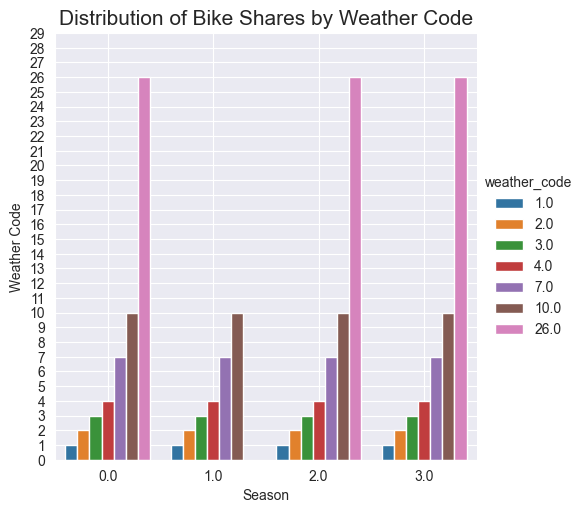

In [770]:
# with catplot

# group by code
df_code = df.groupby(by=['weather_code', 'season']).mean().reset_index()

# Visualization

sns.catplot(x='season', y='weather_code', data=df_code, hue='weather_code', kind='bar')
plt.xlabel('Season')
plt.ylabel('Weather Code')
plt.title('Distribution of Bike Shares by Weather Code', fontsize=15)
plt.yticks(np.arange(0, 30, 1))
plt.grid(True)
plt.minorticks_on()
plt.show()